# Syntactic Simplicity Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '')))
from reward.simplicity import SyntacticSimplicity, shift_to_score

# load data
ls = pd.read_csv('../data/leichtesprache2.csv', encoding='cp1252', sep=";")
tc = pd.read_csv('../data/textcomplexityde.csv', encoding='cp1252')

# load score
syn_simpl = SyntacticSimplicity()

In [3]:
tc_fre_c = []
tc_fre_s = []
for idx, row in tc.iterrows():
    tc_fre_c.append(syn_simpl.readability_score(row['Complex']))
    tc_fre_s.append(syn_simpl.readability_score(row['Simplification']))

ls_fre_c = []
ls_fre_s = []
for idx, row in ls.iterrows():
    ls_fre_c.append(syn_simpl.readability_score(row['Complex']))
    ls_fre_s.append(syn_simpl.readability_score(row['Simplification']))

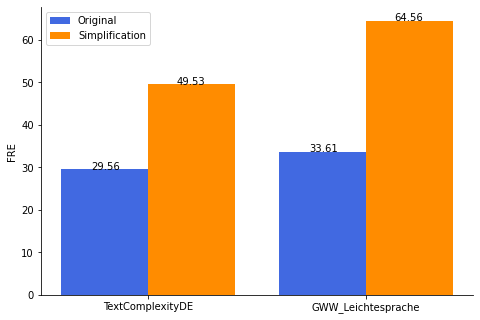

In [4]:
%matplotlib inline
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(0-0.2, np.mean(tc_fre_c), color = 'royalblue', width = 0.4)
ax.bar(0+0.2, np.mean(tc_fre_s), color = 'darkorange', width = 0.4)
ax.bar(1-0.2, np.mean(ls_fre_c), color = 'royalblue', width = 0.4)
ax.bar(1+0.2, np.mean(ls_fre_s), color = 'darkorange', width = 0.4)
ax.set_ylabel('FRE')
ax.set_xticks([0, 1])
ax.set_xticklabels(["TextComplexityDE", "GWW_Leichtesprache"])
ax.legend(['Original', 'Simplification'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# write text on bars
plt.text(0-0.26, np.mean(tc_fre_c), "%.2f" % np.mean(tc_fre_c))
plt.text(0+0.13, np.mean(tc_fre_s), "%.2f" % np.mean(tc_fre_s))
plt.text(1-0.26, np.mean(ls_fre_c), "%.2f" % np.mean(ls_fre_c))
plt.text(1+0.13, np.mean(ls_fre_s), "%.2f" % np.mean(ls_fre_s))

plt.show()

In [5]:
tc_scores = syn_simpl.score(tc['Complex'], tc['Simplification'])
ls_scores = syn_simpl.score(ls['Complex'], ls['Simplification'])

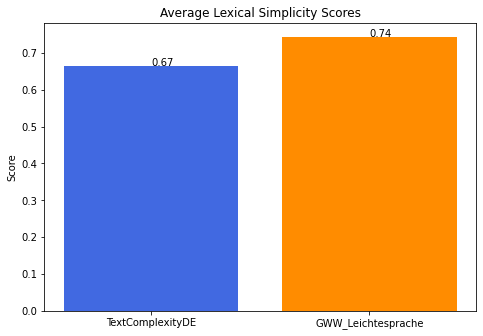

In [6]:
%matplotlib inline
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(0, np.mean(tc_scores), color = 'royalblue', width = 0.8)
ax.bar(1, np.mean(ls_scores), color = 'darkorange', width = 0.8)
ax.set_ylabel('Score')
ax.set_title('Average Lexical Simplicity Scores')
ax.set_xticks([0, 1])
ax.set_xticklabels(["TextComplexityDE", "GWW_Leichtesprache"])

plt.text(0, np.mean(tc_scores), "%.2f" % np.mean(tc_scores))
plt.text(1, np.mean(ls_scores), "%.2f" % np.mean(ls_scores))

plt.show()